In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")# your path here

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_train = X_train / 255.0

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred = svm_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'SVM Validation accuracy: {val_accuracy:.5f}')


RMSE: 0.12946


,Id,SalePrice
0,1461,124861.977220
1,1462,154849.737021
2,1463,185281.015421
3,1464,190606.089063
4,1465,192238.397266
5,1466,175354.311113
6,1467,175664.254857
7,1468,165939.268289
8,1469,189590.617450
9,1470,125444.763262


In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")# your path here
test_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\test.csv")# your path here

x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.values

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = utils.to_categorical(y_train)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

print("Размер обучающей выборки:", X_train.shape, Y_train.shape)
print("Размер валидационной выборки:", X_val.shape, Y_val.shape)

Размер обучающей выборки: (37800, 28, 28, 1) (37800, 10)
Размер валидационной выборки: (4200, 28, 28, 1) (4200, 10)


28

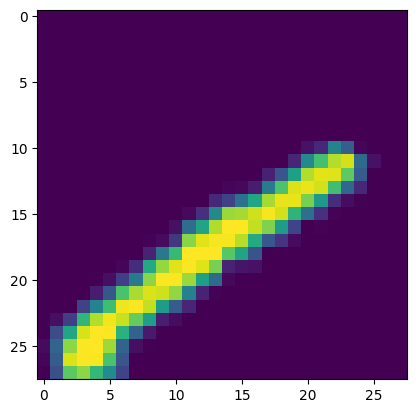

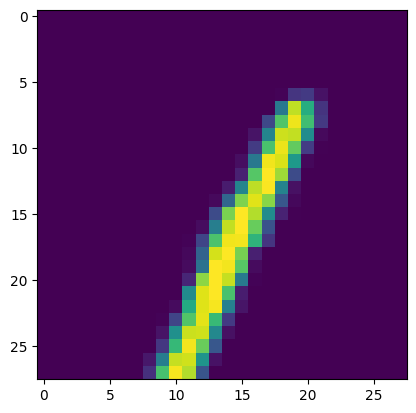

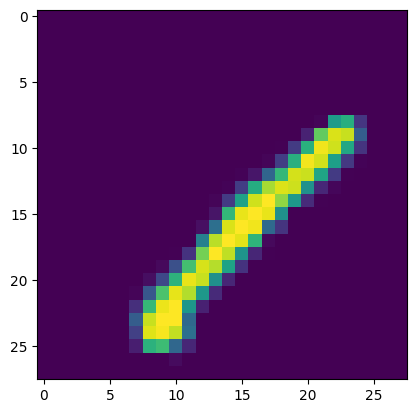

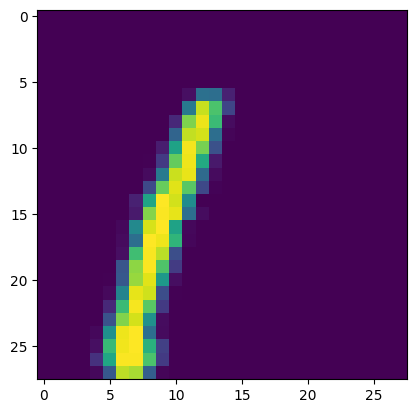

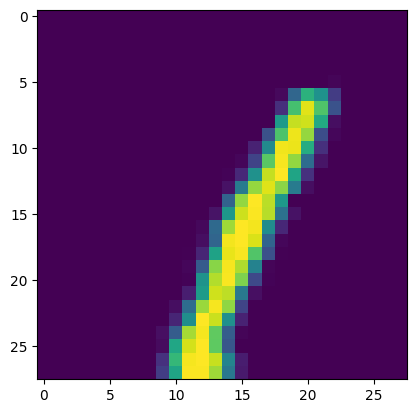

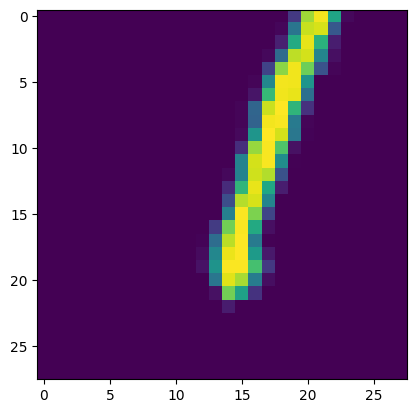

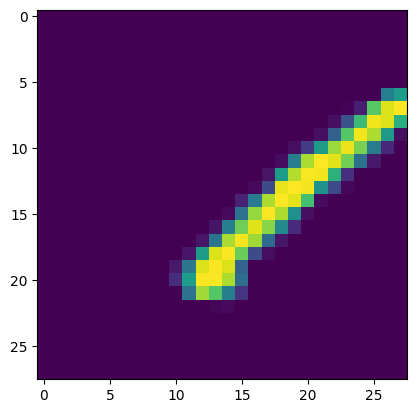

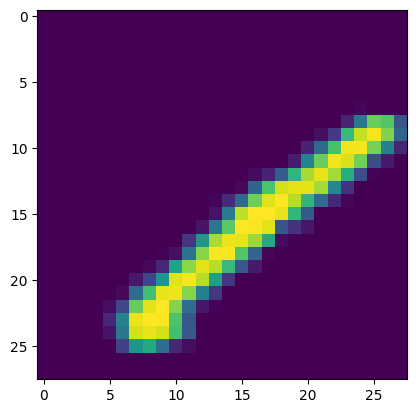

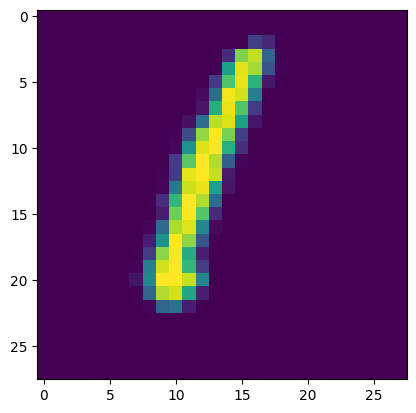

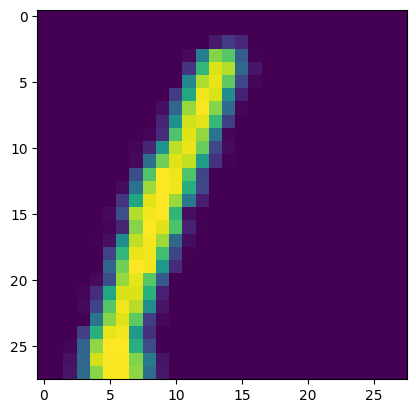

In [3]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        vertical_flip=False
)
i = 0
data = x_train[0]
data = np.expand_dims(data, axis=0)

for batch in datagen.flow(data, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0][:,:,0])

  i += 1
  if i % 10 == 0:
    break

plt.show()

Epoch 1/10


d:\Anaconda\envs\my-course\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8433 - loss: 0.5131 - val_accuracy: 0.9736 - val_loss: 0.0798
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9756 - loss: 0.0822 - val_accuracy: 0.9850 - val_loss: 0.0446
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9856 - loss: 0.0483 - val_accuracy: 0.9876 - val_loss: 0.0415
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9876 - val_loss: 0.0470
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9886 - loss: 0.0332 - val_accuracy: 0.9898 - val_loss: 0.0338
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9933 - loss: 0.0227 - val_accuracy: 0.9855 - val_loss: 0.0436
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9928 - loss: 0.0215 - val_accuracy: 0.9895 - val_loss: 0.0382
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9935 - loss: 0.0187 - val_accuracy: 0.9

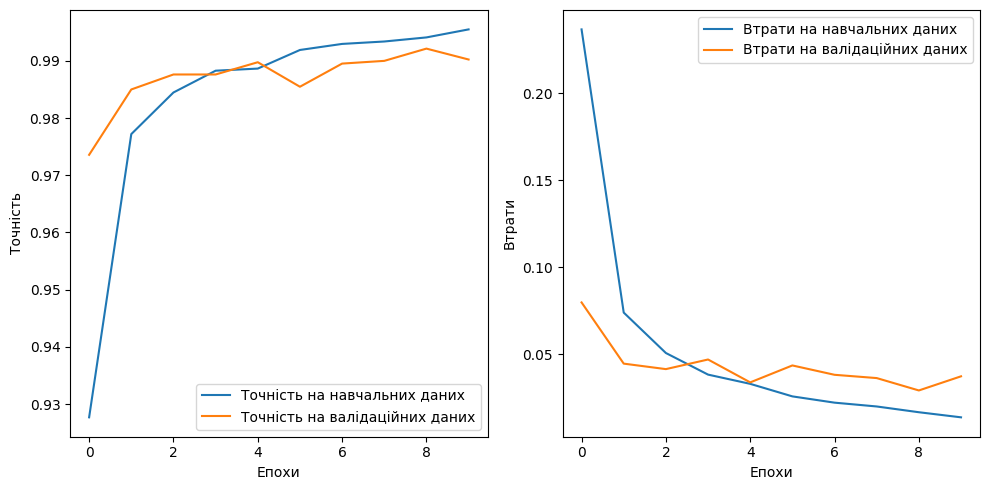

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")  
test_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\test.csv")   

x_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_data['label'].values)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=64,epochs=10, validation_data=(X_val, Y_val))

test_images = test_data.values.reshape(-1, 28, 28, 1) / 255.0
predictions = model.predict(test_images)
model.evaluate(X_val, Y_val)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
predicted_classes = np.argmax(predictions, axis=1)
submission = pd.DataFrame({'ImageId': range(1, len(predicted_classes) + 1), 'Label': predicted_classes})
submission.to_csv(r"D:\Projects\Digit-Recognizer\predictions.csv", index=False)# your path here

More Accurate model

d:\Anaconda\envs\my-course\lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
d:\Anaconda\envs\my-course\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
   1/1181 ━━━━━━━━━━━━━━━━━━━━ 1:19:48 4s/step - accuracy: 0.1250 - loss: 6.0253

d:\Anaconda\envs\my-course\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3515 - loss: 1.7753
Epoch 1: val_accuracy improved from -inf to 0.96476, saving model to D:\Projects\Digit-Recognizer\mnist-cnn.keras
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 126s 103ms/step - accuracy: 0.3516 - loss: 1.7748 - val_accuracy: 0.9648 - val_loss: 0.1387 - learning_rate: 0.0010
Epoch 2/35
   1/1181 ━━━━━━━━━━━━━━━━━━━━ 1:51 95ms/step - accuracy: 0.6562 - loss: 0.6931

d:\Anaconda\envs\my-course\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.96476
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6562 - loss: 0.6931 - val_accuracy: 0.9610 - val_loss: 0.1511 - learning_rate: 0.0010
Epoch 3/35
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8372 - loss: 0.4639
Epoch 3: val_accuracy did not improve from 0.96476
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 119s 101ms/step - accuracy: 0.8373 - loss: 0.4638 - val_accuracy: 0.9619 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 4/35
   1/1181 ━━━━━━━━━━━━━━━━━━━━ 1:53 97ms/step - accuracy: 0.9062 - loss: 0.1952
Epoch 4: val_accuracy did not improve from 0.96476

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9062 - loss: 0.1952 - val_accuracy: 0.9612 - val_loss: 0.1673 - learning_rate: 0.0010
Epoch 5/35
1181/1181 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9435 - loss: 0.1907
Epoch 5: val_accuracy improved from 0.96476 to 0.98619, saving mode

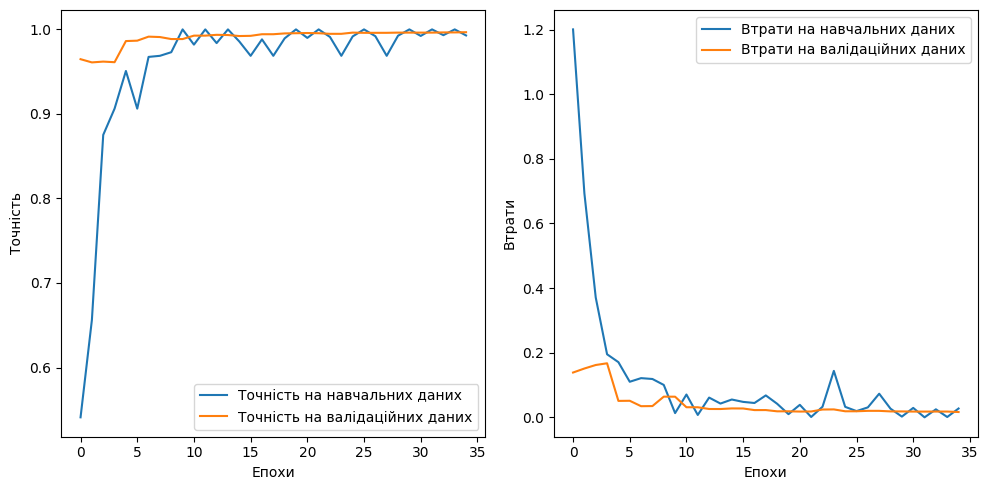

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, ZeroPadding2D, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")  
test_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\test.csv")   

x_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_data['label'].values)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

model = Sequential([Input(shape=(28, 28, 1)),
        ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
        Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same',
                        activation ='relu', input_shape = (28,28,1)),
        BatchNormalization(),
        Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                        activation ='relu'),
        BatchNormalization(),
        Activation(activations.relu),
        MaxPooling2D(pool_size=(2,2)),
        ZeroPadding2D(padding=(1, 1)),
        Dropout(0.2),

        Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                        activation ='relu'),
        BatchNormalization(),
        Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                        activation ='relu'),
        BatchNormalization(),
        Activation(activations.relu),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Dropout(0.2),

        Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                        activation ='relu'),
        BatchNormalization(),
        Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',
                        activation ='relu'),
        BatchNormalization(),
        Activation(activations.relu),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation = "relu"),
        Dropout(0.4),
        Dense(10, activation = "softmax")
])

# Callback for saving the best model
checkpoint = ModelCheckpoint(r'D:\Projects\Digit-Recognizer\mnist-cnn.keras', # your path here
                             monitor='val_accuracy',     # Accuracy on the validation set
                             save_best_only=True,        # Save only the best model
                             verbose=1)                  # Log output

# Callback for learning rate reductio
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',  # Metric
                                            patience=3,             # Number of epochs with no improvement
                                            verbose=1,              # Log output
                                            factor=0.5,             # Factor by which the learning rate will be reduced
                                            min_lr=0.00001)         # Minimum learning rate

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
   rotation_range=10,          # Randomly rotate images by up to 10 degrees
   zoom_range=0.1,             # Randomly zoom images by up to 10%
   width_shift_range=0.1,      # Randomly shift images horizontally by up to 10%
   height_shift_range=0.1,     # Randomly shift images vertically by up to 10%
)

# Batch size
batch_size = 32

# Train the model and save the training history
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=35,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[checkpoint, learning_rate_reduction],
                    shuffle=True)


test_images = test_data.values.reshape(-1, 28, 28, 1) / 255.0
predictions = model.predict(test_images)
model.evaluate(X_val, Y_val)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()